In [37]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib

import rtmtools.lblrtm.aerutils as aerutils
importlib.reload(aerutils)
import rtmtools.clirad.sw.wrangle as cliradwrangle
importlib.reload(cliradwrangle)
import rtmtools.rrtmg.lw.wrangle as rrtmgwrangle
importlib.reload(rrtmgwrangle)

import climatools.offline_scripts.intermodel as scripts_intermodel
importlib.reload(scripts_intermodel)


<module 'climatools.offline_scripts.intermodel' from '/nuwa_cluster/home/jackyu/climatools/climatools/offline_scripts/intermodel.py'>

In [2]:
name_molecule = 'H2O' #r'$H_{2}O$'

In [3]:
#### Load CRD results

In [4]:
# Get lbl line-by-line results
pathout_crd = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples', 
                           'lbl_H2008_h2O_cut25/OUTPUT_RADSUM')

pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd, 
                                                cooling_rate=True, 
                                                signed_fluxes=True)

In [5]:
# H1996 cutoff = 10 cm-1
pathout_crd1 = os.path.join('/nuwa_cluster/home/jackyu',
                            'radiation/crd/LW/examples',
                            'lbl_H1996_H2O_cut10/OUTPUT_RADSUM')

pnl_crd1 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd1, 
                                                 cooling_rate=True, 
                                                 signed_fluxes=True)

In [6]:
#### Load CLIRAD results

In [7]:
# Read OUTPUT_CLIRAD.dat
pathout_clirad = os.path.join('/nuwa_cluster/home/jackyu',
                              'radiation/clirad/LW/examples',
                              'mls75_H2O_H2012/OUTPUT_CLIRAD.dat')

pnl_clirad = cliradwrangle.\
             OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad,
                                          cooling_rate=True, 
                                          signed_fluxes=True)

In [8]:
pathout_clirad_96 = os.path.join('/nuwa_cluster/home/jackyu',
                                 'radiation/clirad/LW/examples',
                                 'mls75_H2O/OUTPUT_CLIRAD.dat')

pnl_clirad_96 = cliradwrangle.\
                OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad_96, 
                                             cooling_rate=True,
                                             signed_fluxes=True)

In [9]:
#### Load LBLRTM results

In [10]:
# Get AER line-by-line results
pathout_lblrtm = os.path.join('/nuwa_cluster/home/jackyu',
                              'line_by_line/aerlbl_v12.2_package',
                              'runs/LW/run_mls75pro_H2O/OUTPUT_RADSUM')

pnl_lblrtm = aerutils.\
             OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_lblrtm, 
                                          signed_fluxes=True, 
                                          cooling_rate=True)

In [11]:
#### Load RRTMG results

In [12]:
pathout_rrtmg = os.path.join('/nuwa_cluster/home/jackyu',
                             'radiation/rrtmg/LW/examples',
                             'mls70_H2O/OUTPUT_RRTM')

pnl_rrtmg = rrtmgwrangle.\
            OUTPUT_RRTM_to_pandasPanel(readfrom=pathout_rrtmg,
                                       signed_fluxes=True,
                                       cooling_rate = True)

# Whole spectral range

CRD
       pressure     flux_up   flux_down    net_flux  cooling_rate
70     0.002417 -335.485371    0.000000 -335.485371      0.000000
30   299.800000 -340.015795   30.912823 -309.102972      2.229663
0   1013.000000 -423.662018  272.861922 -150.800097      1.811151

LBLRTM
     pressure     flux_up   flux_down    net_flux  cooling_rate
70     0.0024 -335.176214    0.000000 -335.176214      0.000000
30   299.8000 -339.805305   31.105327 -308.699977      2.098117
0   1013.0000 -423.532488  272.902015 -150.630473      1.766477

RRTMG
      pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -334.2143     0.0000 -334.2143       0.00000
30   299.70000 -339.1301    31.1483 -307.9818       2.08088
0   1013.00000 -423.5981   275.0453 -148.5528       1.87119

CLIRAD
       pressure     flux_up   flux_down    net_flux  cooling_rate
70     0.002417 -333.074616    0.001241 -333.073375      5.885975
30   299.800000 -337.951636   31.266144 -306.685492      2.200480
0   1013.000000

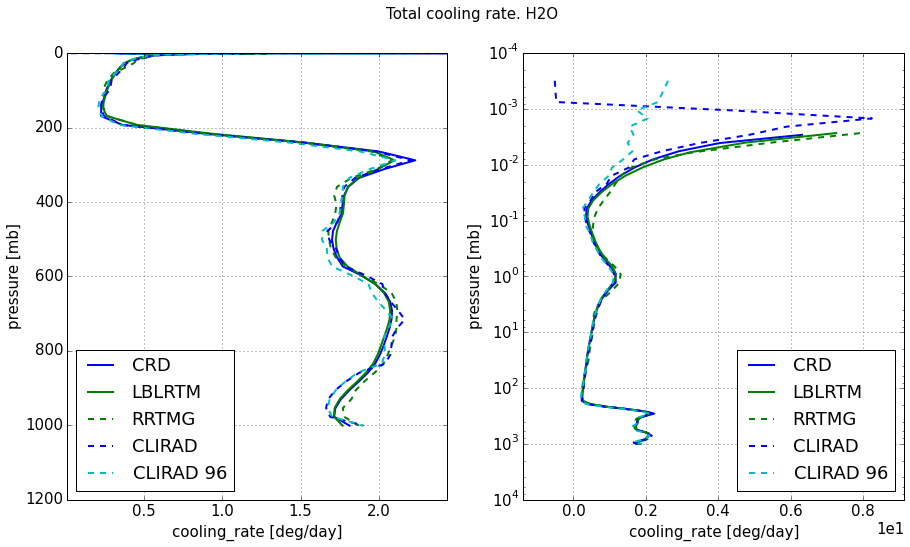

In [34]:
scripts_intermodel.lw_results_all_wavenumbers(
    infos_wavenumber=[('CRD', 'b', '-', pnl_crd),
                      ('LBLRTM', 'g', '-', pnl_lblrtm),
                      ('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_spectralband=[('CLIRAD', 'b', '--', pnl_clirad),
                        ('CLIRAD 96', 'c', '--', pnl_clirad_96)],
    name_molecule=name_molecule)

In [14]:
html_download = ('<a href="./longwave_mls_{name_molecule}_total.xlsx"'
                 'download>longwave_mls_{name_molecule}_total.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In RRTMG's wavenumber bands

Flux tables and cooling rates in RRTMG spectral bands


RRTMG-LW spectral band 1. 10.0 ~ 350.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -36.3061     0.0000  -36.3061      -0.00000
30   299.70000 -38.7258    22.3568  -16.3690       1.36489
0   1013.00000 -54.5825    54.5778   -0.0047       0.00201

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -36.618217   0.000000 -36.618217      0.000000
30   299.800000 -38.842137  22.076937 -16.765200      1.442737
0   1013.000000 -54.573788  54.550693  -0.023095      0.008350

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -36.723339   0.000000 -36.723339      0.000000
30   299.8000 -38.985445  22.030611 -16.954833      1.334082
0   1013.0000 -54.581667  54.656241   0.074573      0.030404

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.312117   0.000000  0.312117     -0.000000
30 -0.100000  0.116

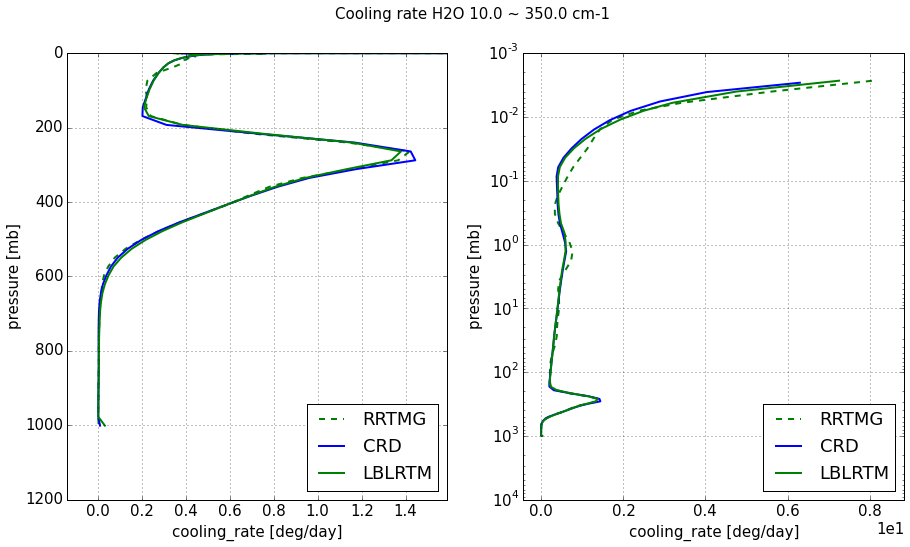


------------------------------------------------------------------------

RRTMG-LW spectral band 2. 350.0 ~ 500.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -44.3208     0.0000  -44.3208      -0.00000
30   299.70000 -45.1535     5.2688  -39.8847       0.46769
0   1013.00000 -60.9174    60.7515   -0.1659       0.05173

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -44.422999   0.000000 -44.422999      0.000000
30   299.800000 -45.270518   5.428052 -39.842466      0.522785
0   1013.000000 -60.916638  60.564791  -0.351847      0.065126

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -44.312334   0.000000 -44.312334      0.000000
30   299.8000 -45.185905   5.581554 -39.604351      0.506829
0   1013.0000 -60.917465  60.568471  -0.348993      0.074194

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.102199   0.000000  0.102199     -0.000000

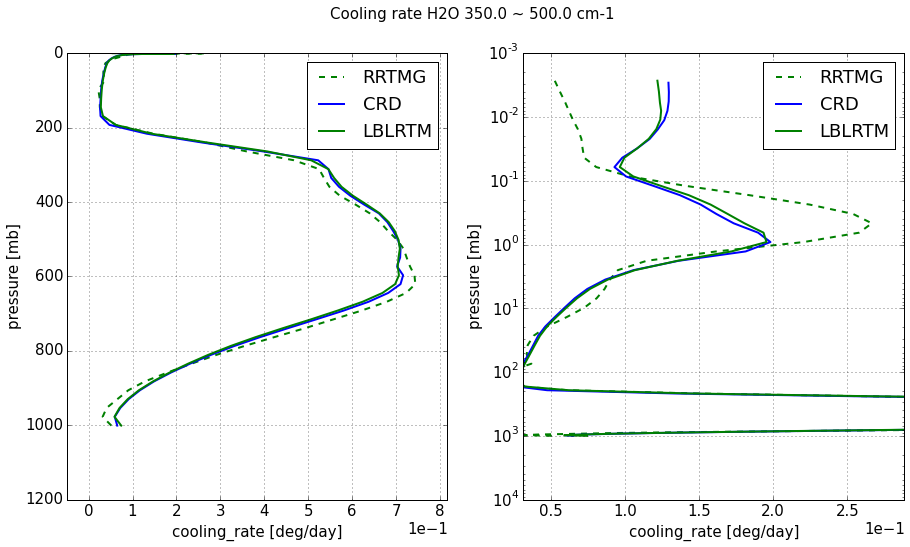


------------------------------------------------------------------------

RRTMG-LW spectral band 3. 500.0 ~ 630.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -47.0755     0.0000  -47.0755      -0.00000
30   299.70000 -47.3985     1.1975  -46.2010       0.11909
0   1013.00000 -58.6463    54.0152   -4.6311       0.40161

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -47.204841   0.000000 -47.204841      0.000000
30   299.800000 -47.486463   1.183130 -46.303334      0.124701
0   1013.000000 -58.652387  53.147737  -5.504650      0.378407

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -47.012150   0.000000 -47.012150      0.000000
30   299.8000 -47.309167   1.253733 -46.055434      0.126809
0   1013.0000 -58.646623  53.244945  -5.401678      0.367988

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.129341   0.000000  0.129341     -0.000000

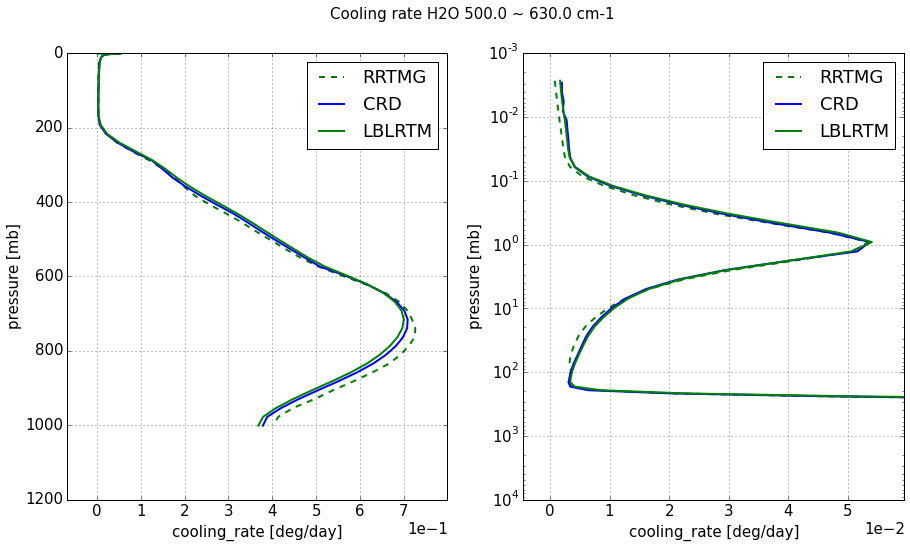


------------------------------------------------------------------------

RRTMG-LW spectral band 4. 630.0 ~ 700.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -27.1021     0.0000  -27.1021      -0.00000
30   299.70000 -27.1641     0.1609  -27.0032       0.01793
0   1013.00000 -30.8951    20.5885  -10.3066       0.31701

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -27.069898   0.000000 -27.069898      0.000000
30   299.800000 -27.127383   0.173199 -26.954184      0.019684
0   1013.000000 -30.901144  20.322693 -10.578451      0.298899

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -27.048460   0.000000 -27.048460      0.000000
30   299.8000 -27.107277   0.174463 -26.932814      0.019042
0   1013.0000 -30.895458  20.365852 -10.529606      0.291866

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.032202   0.000000 -0.032202     -0.000000

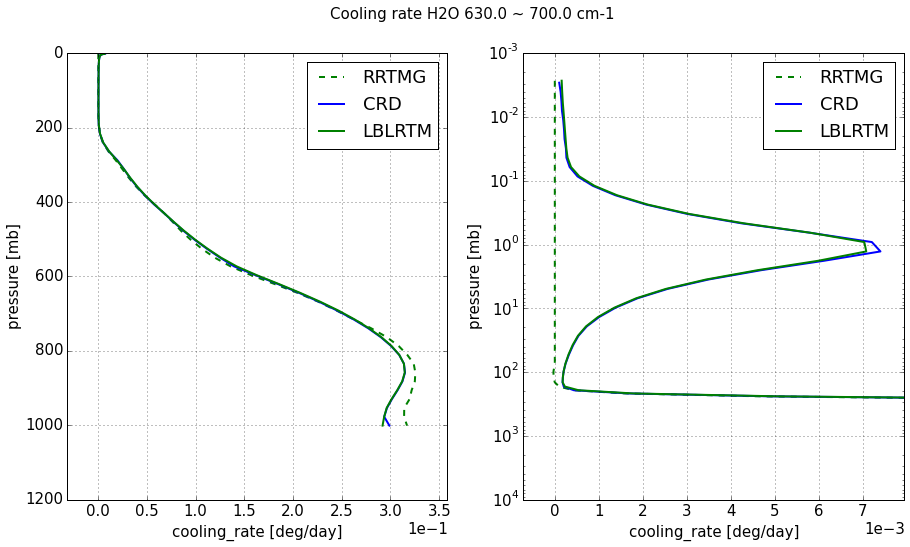


------------------------------------------------------------------------

RRTMG-LW spectral band 5. 700.0 ~ 820.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -46.0020     0.0000  -46.0020      -0.00000
30   299.70000 -46.0326     0.0487  -45.9839       0.00448
0   1013.00000 -48.8867    17.0901  -31.7966       0.38616

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -45.981097   0.000000 -45.981097      0.000000
30   299.800000 -46.010205   0.058138 -45.952067      0.005716
0   1013.000000 -48.899846  17.046923 -31.852922      0.372074

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -45.956634   0.000000 -45.956634      0.000000
30   299.8000 -45.986205   0.057718 -45.928487      0.005441
0   1013.0000 -48.886744  17.071499 -31.815245      0.361913

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.020903   0.000000 -0.020903     -0.000000

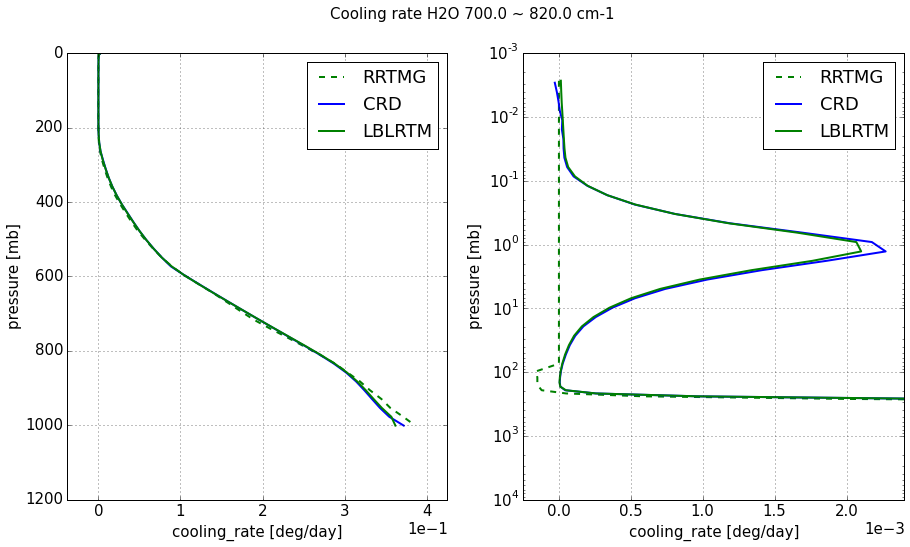


------------------------------------------------------------------------

RRTMG-LW spectral band 6. 820.0 ~ 980.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -53.0264     0.0000  -53.0264      -0.00000
30   299.70000 -53.0324     0.0038  -53.0286      -0.00025
0   1013.00000 -53.9607     6.1714  -47.7893       0.18999

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -53.054398   0.000000 -53.054398      0.000000
30   299.800000 -53.059742   0.004696 -53.055046     -0.000011
0   1013.000000 -53.981634   6.000207 -47.981427      0.178273

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -53.022931   0.000000 -53.022931      0.000000
30   299.8000 -53.028271   0.004477 -53.023794     -0.000042
0   1013.0000 -53.960338   5.960443 -47.999895      0.168585

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.027998   0.000000  0.027998     -0.000000

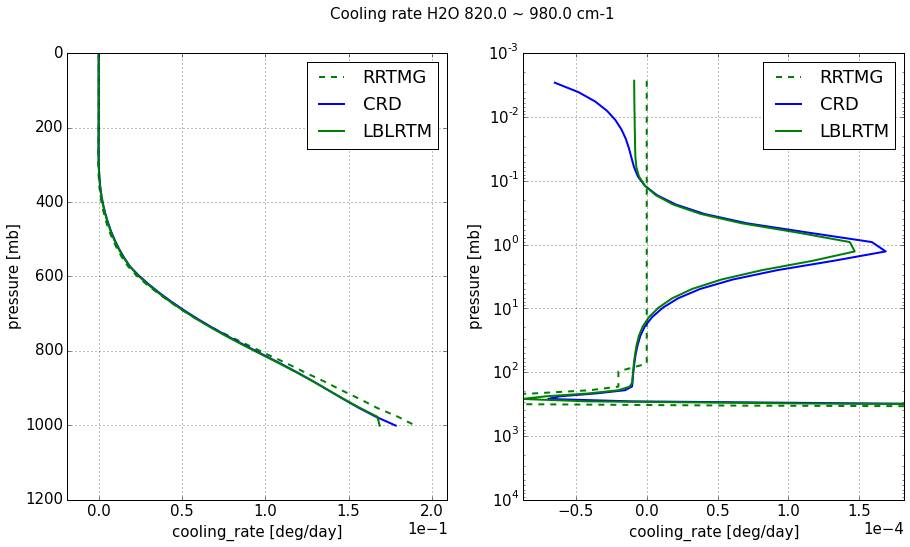


------------------------------------------------------------------------

RRTMG-LW spectral band 7. 980.0 ~ 1080.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -26.2661     0.0000  -26.2661      -0.00000
30   299.70000 -26.2683     0.0010  -26.2673      -0.00018
0   1013.00000 -26.6402     2.2795  -24.3607       0.07521

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -26.286758   0.000000 -26.286758      0.000000
30   299.800000 -26.288478   0.001112 -26.287366     -0.000083
0   1013.000000 -26.654056   2.197288 -24.456768      0.071793

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -26.267006   0.000000 -26.267006      0.000000
30   299.8000 -26.268713   0.001066 -26.267647     -0.000084
0   1013.0000 -26.640246   2.184222 -24.456024      0.067453

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.020658   0.000000  0.020658     -0.00000

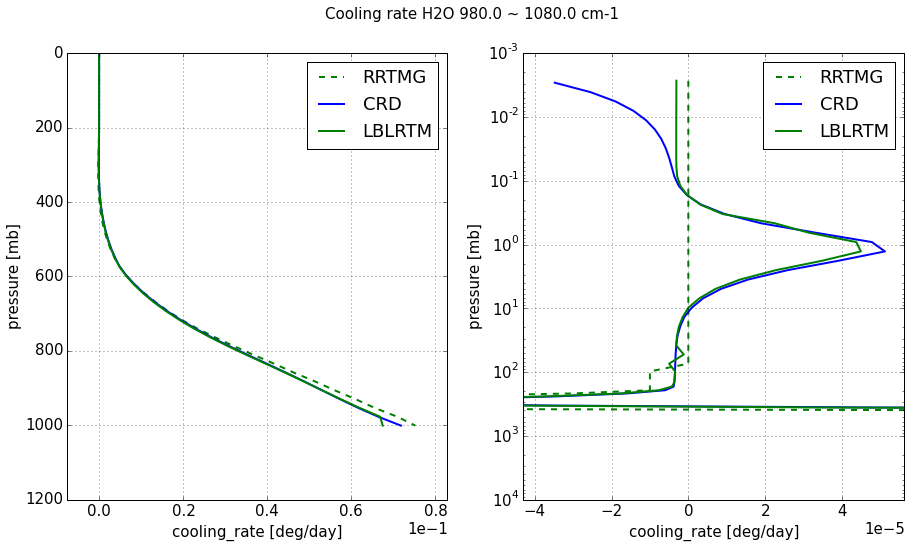


------------------------------------------------------------------------

RRTMG-LW spectral band 8. 1080.0 ~ 1180.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -20.5192     0.0000  -20.5192      -0.00000
30   299.70000 -20.5287     0.0066  -20.5221      -0.00014
0   1013.00000 -21.5225     4.5509  -16.9716       0.12243

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -20.552467   0.000000 -20.552467      0.000000
30   299.800000 -20.559894   0.007166 -20.552729      0.000092
0   1013.000000 -21.535940   4.360290 -17.175650      0.114865

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -20.539627   0.000000 -20.539627      0.000000
30   299.8000 -20.547063   0.006978 -20.540085      0.000067
0   1013.0000 -21.522739   4.351903 -17.170835      0.111439

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.033267   0.000000  0.033267     -0.0000

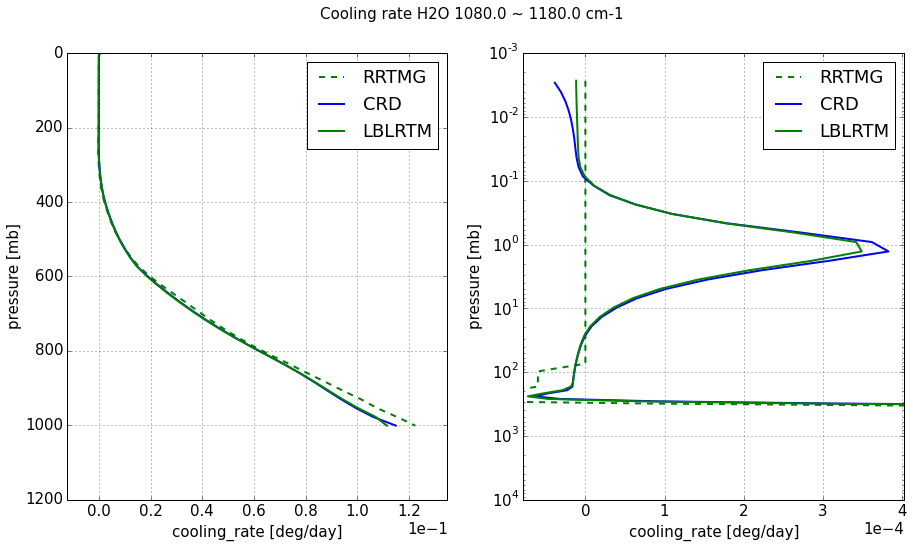


------------------------------------------------------------------------

RRTMG-LW spectral band 9. 1180.0 ~ 1390.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -22.0664     0.0000  -22.0664      -0.00000
30   299.70000 -22.3024     0.3088  -21.9936       0.01648
0   1013.00000 -31.2998    22.2084   -9.0914       0.25038

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -22.364859   0.000000 -22.364859      0.000000
30   299.800000 -22.516322   0.240063 -22.276259      0.013872
0   1013.000000 -31.323236  22.084979  -9.238257      0.247089

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -22.383453   0.000000 -22.383453      0.000000
30   299.8000 -22.535776   0.239734 -22.296042      0.013208
0   1013.0000 -31.299603  22.000981  -9.298622      0.247393

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.298459   0.000000  0.298459     -0.0000

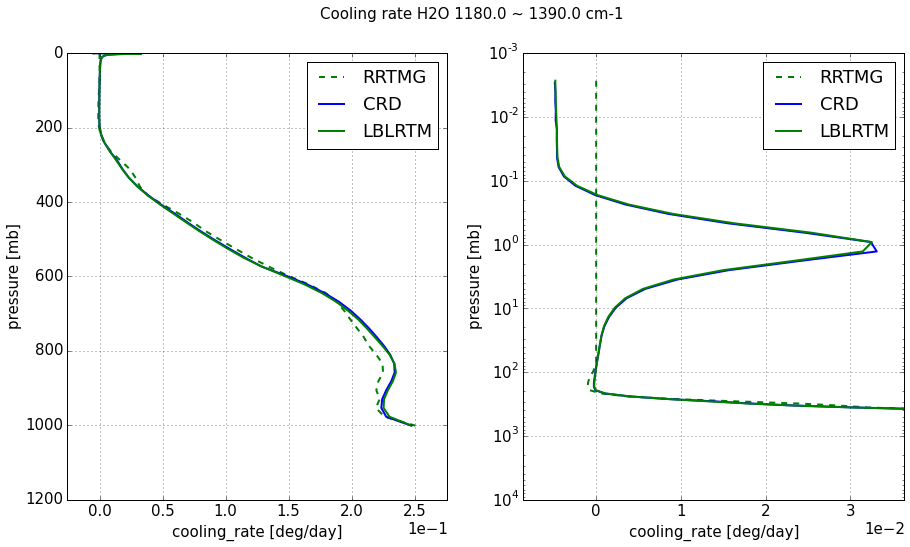


------------------------------------------------------------------------

RRTMG-LW spectral band 10. 1390.0 ~ 1480.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -2.4808     0.0000   -2.4808      -0.00000
30   299.70000  -2.7200     0.4662   -2.2538       0.02661
0   1013.00000  -8.8986     8.8866   -0.0120       0.00512

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -2.529233   0.000000 -2.529233      0.000000
30   299.800000 -2.762602   0.447570 -2.315032      0.027789
0   1013.000000 -8.906562   8.890356 -0.016206      0.005849

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -2.543163   0.000000 -2.543163      0.000000
30   299.8000 -2.778233   0.450082 -2.328151      0.026121
0   1013.0000 -8.898490   8.879336 -0.019154      0.004226

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.048433   0.000000  0.048433     -0.000000
30 -0.100000

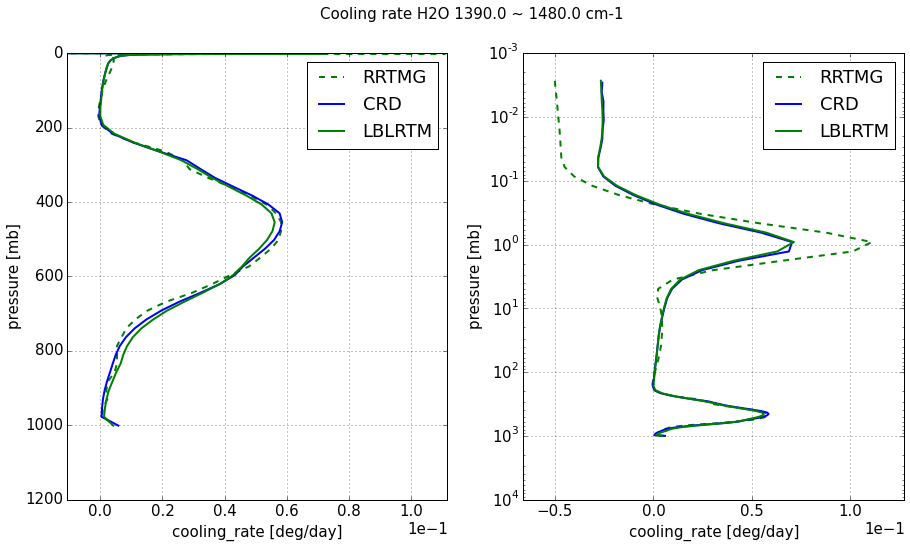


------------------------------------------------------------------------

RRTMG-LW spectral band 11. 1480.0 ~ 1800.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -3.2226     0.0000   -3.2226      -0.00000
30   299.70000  -3.8991     1.2651   -2.6340       0.06488
0   1013.00000 -17.8828    17.8685   -0.0143       0.00607

CRD
       pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.002417  -3.353829   0.000000 -3.353829      0.000000
30   299.800000  -3.996974   1.237523 -2.759451      0.071399
0   1013.000000 -17.902258  17.865359 -0.036899      0.013083

LBLRTM
     pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.0024  -3.362121   0.000000 -3.362121      0.000000
30   299.8000  -4.019593   1.248877 -2.770716      0.065686
0   1013.0000 -17.882889  17.851415 -0.031474      0.004635

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.131229   0.000000  0.131229     -0.000000
30 -

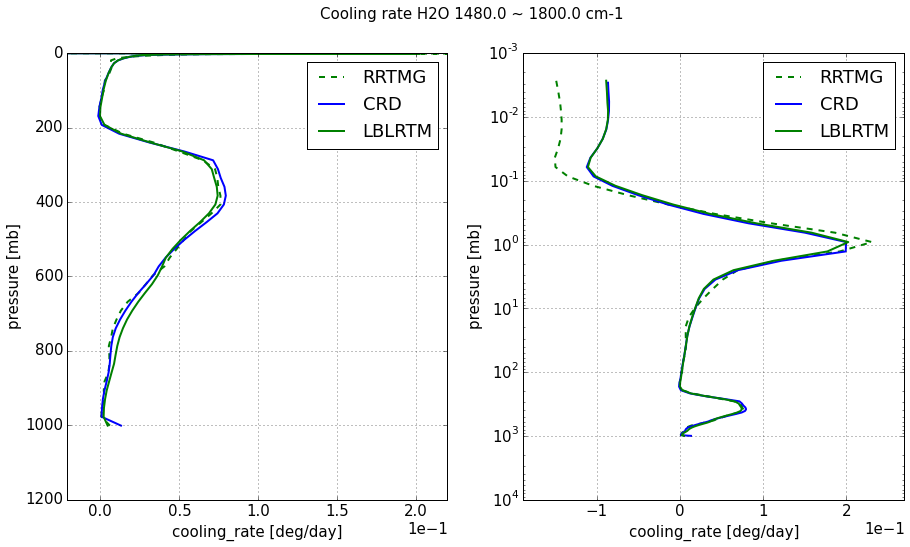


------------------------------------------------------------------------

RRTMG-LW spectral band 12. 1800.0 ~ 2080.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -2.7629     0.0000   -2.7629      -0.00000
30   299.70000  -2.8171     0.0630   -2.7541       0.00084
0   1013.00000  -5.9578     5.2503   -0.7075       0.04283

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -2.816395   0.000000 -2.816395      0.000000
30   299.800000 -2.863743   0.054956 -2.808787      0.001090
0   1013.000000 -5.965987   5.251580 -0.714406      0.039084

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -2.786328   0.000000 -2.786328      0.000000
30   299.8000 -2.834016   0.055757 -2.778259      0.001067
0   1013.0000 -5.957771   5.179354 -0.778417      0.019002

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.053495   0.000000  0.053495     -0.000000
30 -0.100000

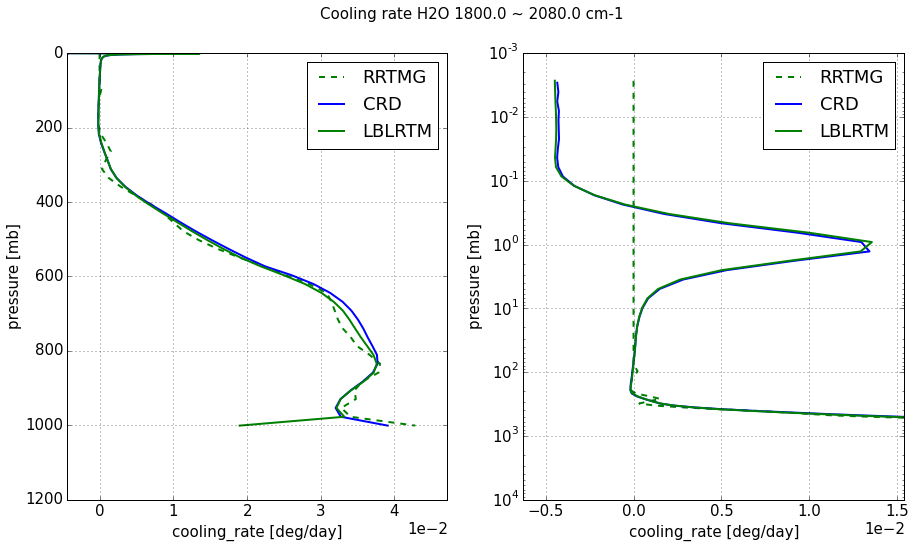


------------------------------------------------------------------------

RRTMG-LW spectral band 13. 2080.0 ~ 2250.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -1.4164     0.0000   -1.4164      -0.00000
30   299.70000  -1.4180     0.0002   -1.4178      -0.00021
0   1013.00000  -1.6390     0.5408   -1.0982       0.01455

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -1.477430   0.000000 -1.477430      0.000000
30   299.800000 -1.478102   0.000236 -1.477865     -0.000072
0   1013.000000 -1.641655   0.446475 -1.195180      0.013461

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -1.470747   0.000000 -1.470747      0.000000
30   299.8000 -1.471435   0.000242 -1.471193     -0.000070
0   1013.0000 -1.639014   0.455507 -1.183507      0.013219

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.061030   0.000000  0.061030     -0.000000
30 -0.100000

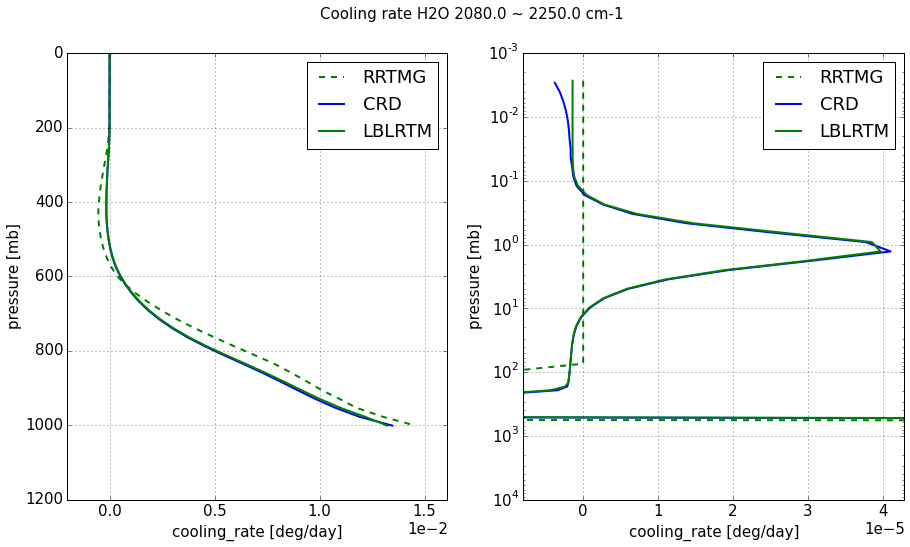


------------------------------------------------------------------------

RRTMG-LW spectral band 14. 2250.0 ~ 2380.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.7315          0   -0.7315            -0
30   299.70000  -0.7315          0   -0.7315            -0
0   1013.00000  -0.7316          0   -0.7316            -0

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.718921   0.000000 -0.718921      0.000000
30   299.800000 -0.718951   0.000003 -0.718948     -0.000005
0   1013.000000 -0.732844   0.045352 -0.687492      0.001860

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.717038   0.000000 -0.717038      0.000000
30   299.8000 -0.717068   0.000003 -0.717065     -0.000005
0   1013.0000 -0.731556   0.046003 -0.685553      0.001722

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.012579   0.000000 -0.012579     -0.000000
30 -0.100000

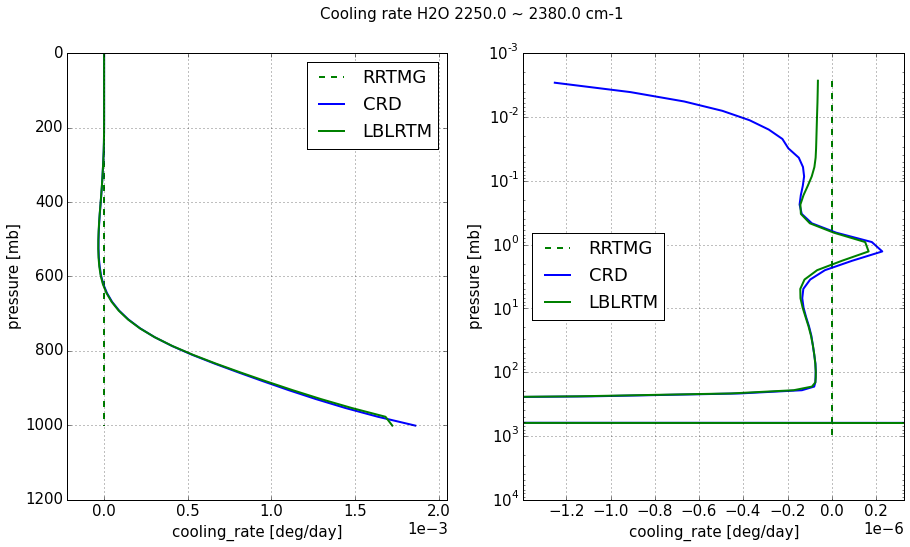


------------------------------------------------------------------------

RRTMG-LW spectral band 15. 2380.0 ~ 2600.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.5487     0.0000   -0.5487      -0.00000
30   299.70000  -0.5702     0.0007   -0.5695      -0.00110
0   1013.00000  -0.6658     0.1142   -0.5516       0.00312

CRD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -0.663910  0.000000e+00 -0.663910      0.000000
30   299.800000 -0.663925  7.815591e-07 -0.663924     -0.000002
0   1013.000000 -0.667119  8.808146e-03 -0.658311      0.000385

LBLRTM
     pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.0024 -0.662192  0.000000e+00 -0.662192      0.000000
30   299.8000 -0.662207  7.552275e-07 -0.662206     -0.000002
0   1013.0000 -0.665840  8.842813e-03 -0.656997      0.000234

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.115210   0.000000  0.115210   

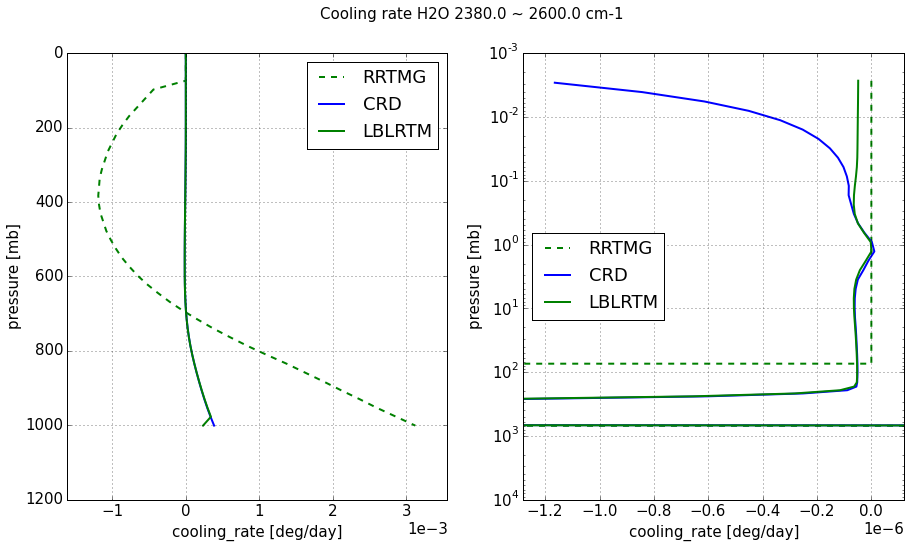


------------------------------------------------------------------------

RRTMG-LW spectral band 16. 2600.0 ~ 3250.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.3668     0.0000   -0.3668      -0.00000
30   299.70000  -0.3679     0.0002   -0.3677      -0.00013
0   1013.00000  -0.4713     0.1516   -0.3197       0.00297

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.367763   0.000000 -0.367763      0.000000
30   299.800000 -0.367997   0.000020 -0.367977     -0.000034
0   1013.000000 -0.404431   0.076088 -0.328343      0.002536

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.366088   0.000000 -0.366088      0.000000
30   299.8000 -0.366327   0.000019 -0.366308     -0.000034
0   1013.0000 -0.403547   0.075430 -0.328116      0.002112

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.000963   0.000000  0.000963     -0.000000
30 -0.100000

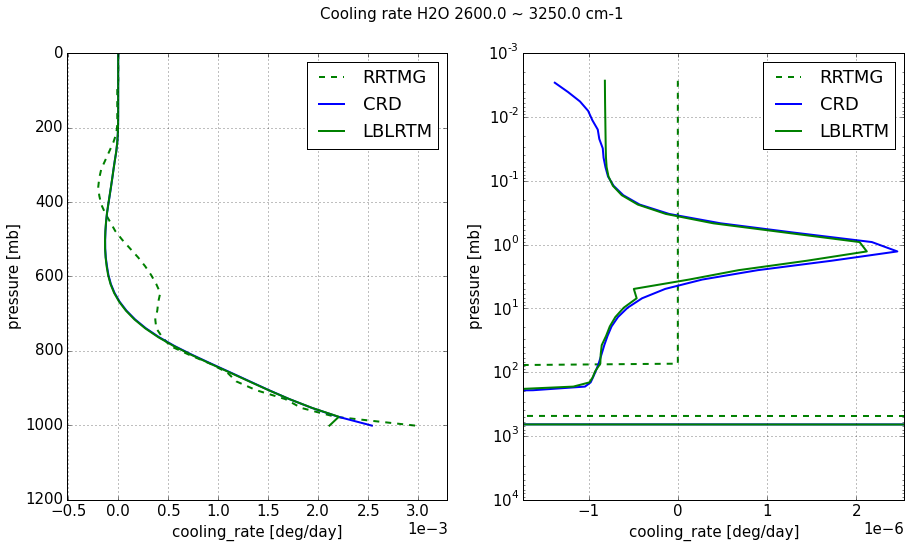


------------------------------------------------------------------------



In [35]:
print('Flux tables and cooling rates in RRTMG spectral bands')
print()
print()

scripts_intermodel.lw_results_by_rrtmg_bands(
    infos_rrtmg=[('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd), 
               ('LBLRTM', 'g', '-', pnl_lblrtm)],
    name_molecule=name_molecule)

In [16]:
html_download = ('<a href="./longwave_mls_{name_molecule}'
                 '_by_rrtmg_bands.xlsx"'
                 'download>longwave_mls_{name_molecule}'
                 '_by_rrtmg_bands.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In CLIRAD's wavenumber bands

Flux tables and cooling rates in CLIRAD spectral bands


CLIRAD-LW spectral band 1. 0 ~ 340 cm-1

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -34.03330   0.001232 -34.032068      6.148719
30   299.800000 -36.40643  21.663380 -14.743050      1.350754
0   1013.000000 -51.09213  51.070570  -0.021560      0.007725

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -34.310935   0.000000 -34.310935      0.000000
30   299.800000 -36.441826  21.391389 -15.050438      1.376942
0   1013.000000 -51.093040  51.071508  -0.021532      0.007733

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -34.414209   0.000000 -34.414209      0.000000
30   299.8000 -36.581592  21.327248 -15.254344      1.271039
0   1013.0000 -51.100657  51.173323   0.072666      0.029632

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.277635   0.001232  0.278867      6.148719
30      

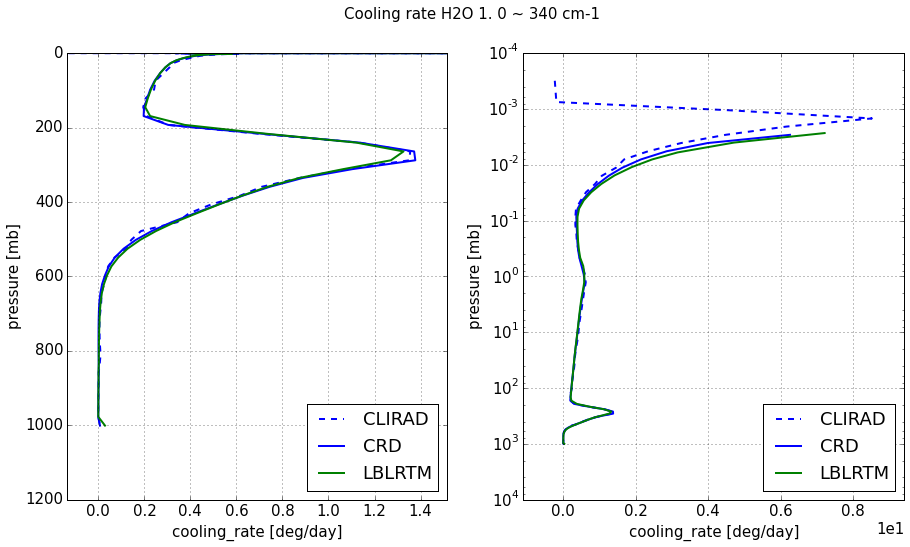


------------------------------------------------------------------------

CLIRAD-LW spectral band 2. 340 ~ 540 cm-1

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -59.82235   0.000003 -59.822347     -0.097136
30   299.800000 -60.99290   6.915163 -54.077737      0.649110
0   1013.000000 -82.31579  81.543440  -0.772350      0.156217

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -60.541409   0.000000 -60.541409      0.000000
30   299.800000 -61.600467   6.651864 -54.948602      0.644241
0   1013.000000 -82.315835  81.330012  -0.985823      0.130917

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -60.328425   0.000000 -60.328425      0.000000
30   299.8000 -61.423870   6.869068 -54.554802      0.627782
0   1013.0000 -82.315849  81.374680  -0.941169      0.139025

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.719059   0.000003  0.719062   

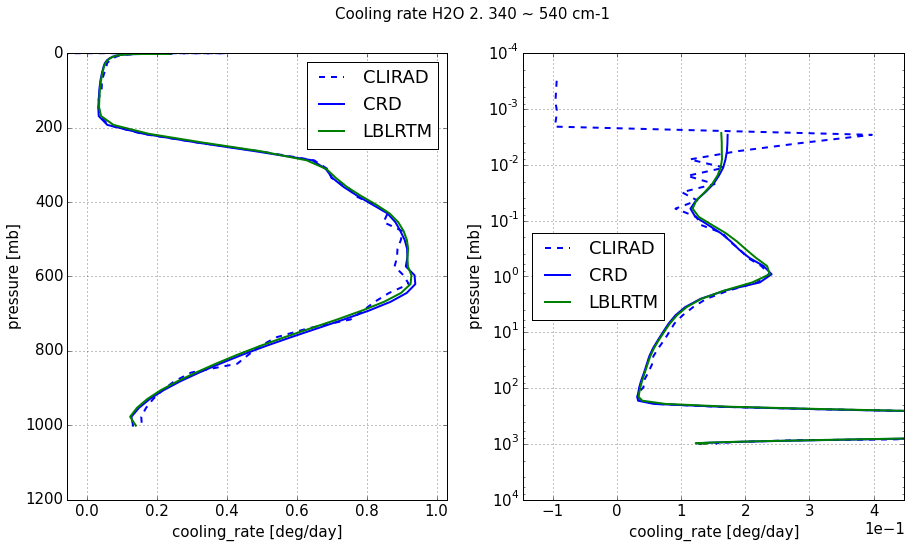


------------------------------------------------------------------------

CLIRAD-LW spectral band 3. 540 ~ 800 cm-1

CLIRAD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417  -97.71744   0.000003 -97.717437     -0.000004
30   299.800000  -97.92890   0.674001 -97.254899      0.089588
0   1013.000000 -112.81600  73.117410 -39.698590      0.909037

CRD
       pressure     flux_up  flux_down   net_flux  cooling_rate
70     0.002417  -99.015291   0.000000 -99.015291      0.000000
30   299.800000  -99.263422   0.874413 -98.389009      0.094366
0   1013.000000 -112.837813  71.524950 -41.312864      0.940123

LBLRTM
     pressure     flux_up  flux_down   net_flux  cooling_rate
70     0.0024  -98.880869   0.000000 -98.880869      0.000000
30   299.8000  -99.137563   0.900061 -98.237502      0.093321
0   1013.0000 -112.816764  71.677675 -41.139088      0.915718

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  1.297851   0.000003 

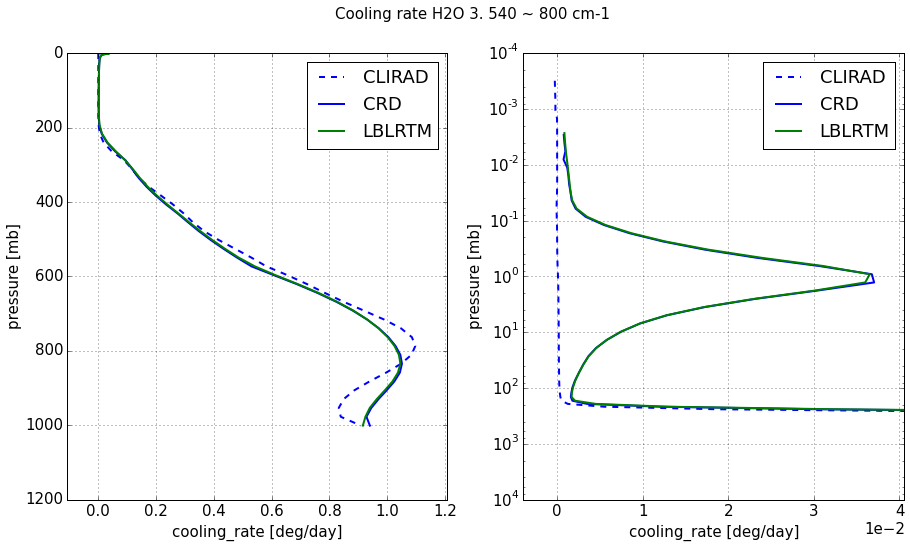


------------------------------------------------------------------------

CLIRAD-LW spectral band 4. 800 ~ 980 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -60.32822  6.214958e-10 -60.328220     -0.000000
30   299.800000 -60.33170  2.764044e-03 -60.328936     -0.000079
0   1013.000000 -61.64931  8.491215e+00 -53.158095      0.242118

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -60.486170   0.000000 -60.486170      0.000000
30   299.800000 -60.493092   0.006507 -60.486585      0.000067
0   1013.000000 -61.681243   7.708875 -53.972367      0.222374

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -60.454948   0.000000 -60.454948      0.000000
30   299.8000 -60.461849   0.006193 -60.455657      0.000022
0   1013.0000 -61.657526   7.643344 -54.014182      0.210667

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.157950  6.21495

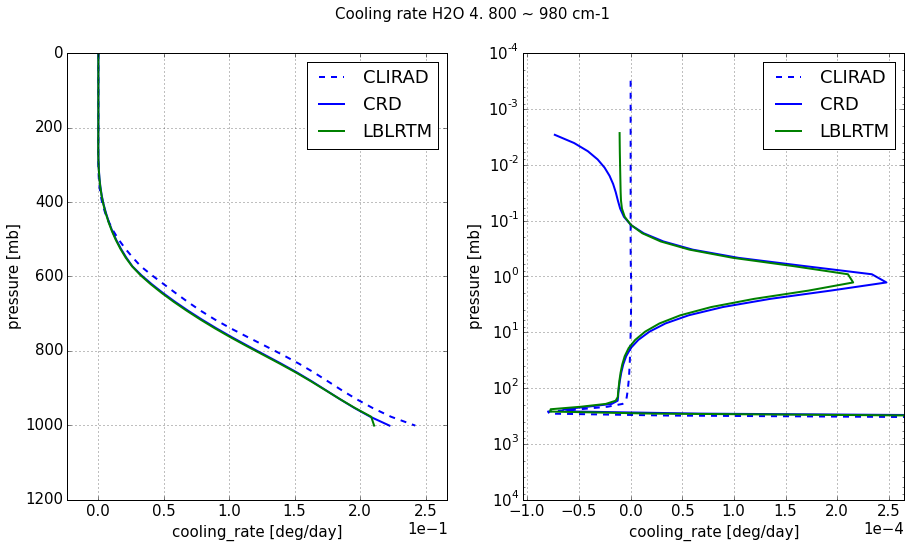


------------------------------------------------------------------------

CLIRAD-LW spectral band 5. 980 ~ 1100 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -30.84983  4.351434e-07 -30.849830     -0.000001
30   299.800000 -30.85086  5.959812e-04 -30.850264     -0.000072
0   1013.000000 -31.34389  3.026181e+00 -28.317709      0.096365

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -30.905162   0.000000 -30.905162      0.000000
30   299.800000 -30.907243   0.001333 -30.905910     -0.000103
0   1013.000000 -31.354231   2.633614 -28.720617      0.085000

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -30.879242   0.000000 -30.879242      0.000000
30   299.8000 -30.881315   0.001280 -30.880035     -0.000105
0   1013.0000 -31.337711   2.634985 -28.702725      0.080500

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.055332  4.3514

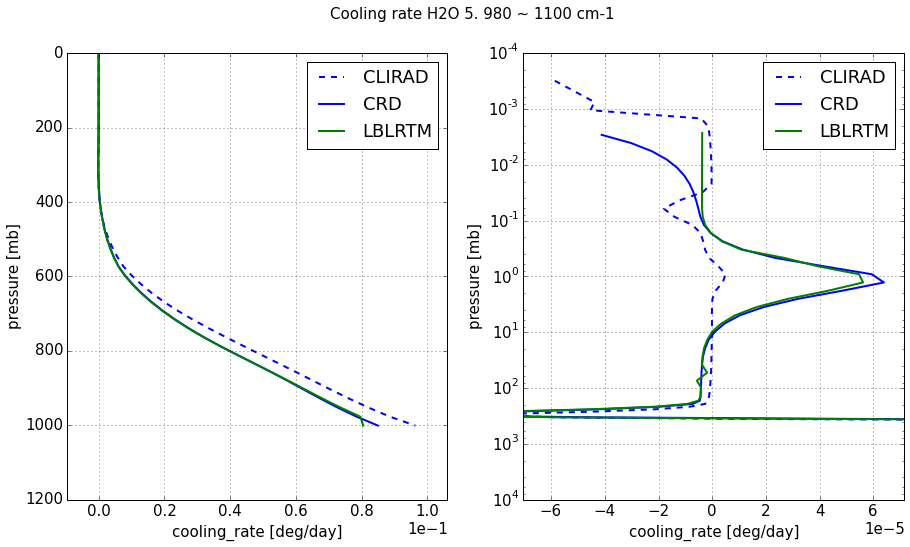


------------------------------------------------------------------------

CLIRAD-LW spectral band 6. 1100 ~ 1215 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -21.79535  2.657388e-13 -21.795350 -3.024772e-09
30   299.800000 -21.80484  8.713370e-03 -21.796127  9.956238e-05
0   1013.000000 -23.27341  6.326471e+00 -16.946939  1.579750e-01

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -21.773071   0.000000 -21.773071      0.000000
30   299.800000 -21.785504   0.012772 -21.772732      0.000306
0   1013.000000 -23.269652   6.305412 -16.964240      0.160466

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -21.757789   0.000000 -21.757789      0.000000
30   299.8000 -21.770345   0.012577 -21.757768      0.000266
0   1013.0000 -23.254791   6.298861 -16.955930      0.156404

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.022279  2.657

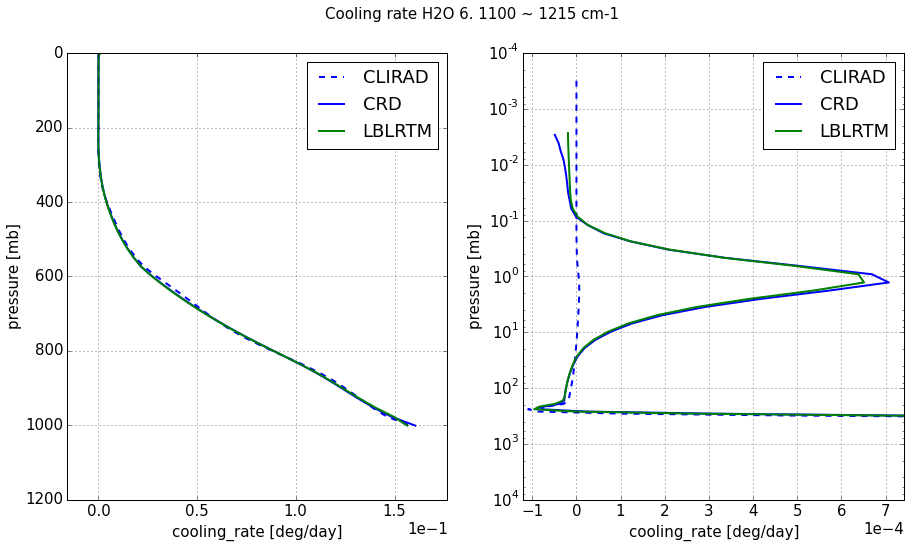


------------------------------------------------------------------------

CLIRAD-LW spectral band 7. 1215 ~ 1380 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -16.32561  4.906120e-10 -16.325610 -6.565916e-07
30   299.800000 -16.46534  2.195141e-01 -16.245826  1.407870e-02
0   1013.000000 -23.74060  1.784015e+01  -5.900450  2.084762e-01

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -16.067263   0.000000 -16.067263      0.000000
30   299.800000 -16.197831   0.207324 -15.990508      0.012007
0   1013.000000 -23.755165  18.572777  -5.182388      0.187100

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -16.086567   0.000000 -16.086567      0.000000
30   299.8000 -16.218299   0.207811 -16.010487      0.011503
0   1013.0000 -23.736876  18.476167  -5.260709      0.187584

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.258347  4.906

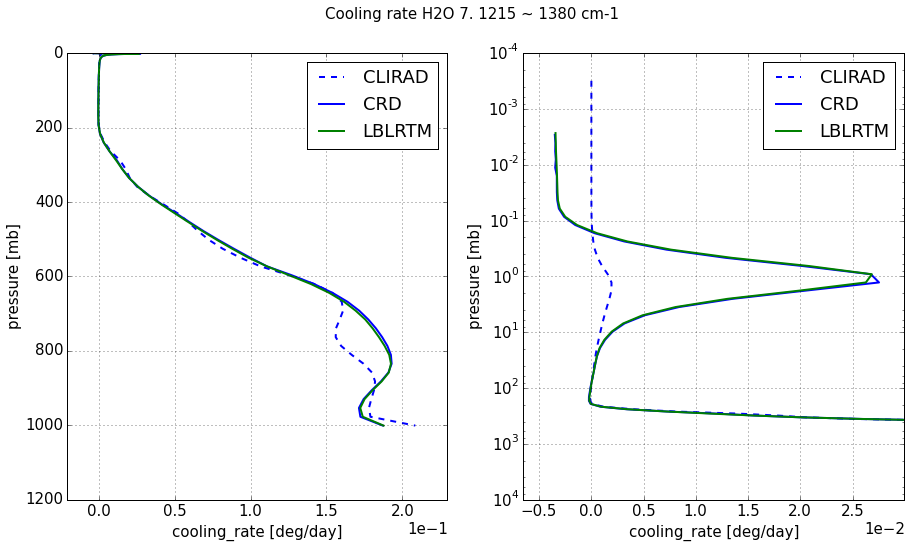


------------------------------------------------------------------------

CLIRAD-LW spectral band 8. 1380 ~ 1900 cm-1

CLIRAD
       pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.002417  -7.341434   0.000002 -7.341432     -0.165602
30   299.800000  -8.295568   1.769966 -6.525602      0.097178
0   1013.000000 -30.880560  30.708790 -0.171770      0.059902

CRD
       pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.002417  -7.265696   0.000000 -7.265696      0.000000
30   299.800000  -8.191717   1.754197 -6.437520      0.102059
0   1013.000000 -30.729595  30.640991 -0.088604      0.027174

LBLRTM
     pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.0024  -7.304761   0.000000 -7.304761      0.000000
30   299.8000  -8.246787   1.767938 -6.478849      0.094475
0   1013.0000 -30.697533  30.596919 -0.100614      0.019163

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0 -0.075738   0.000002 -0.075736     -0.1

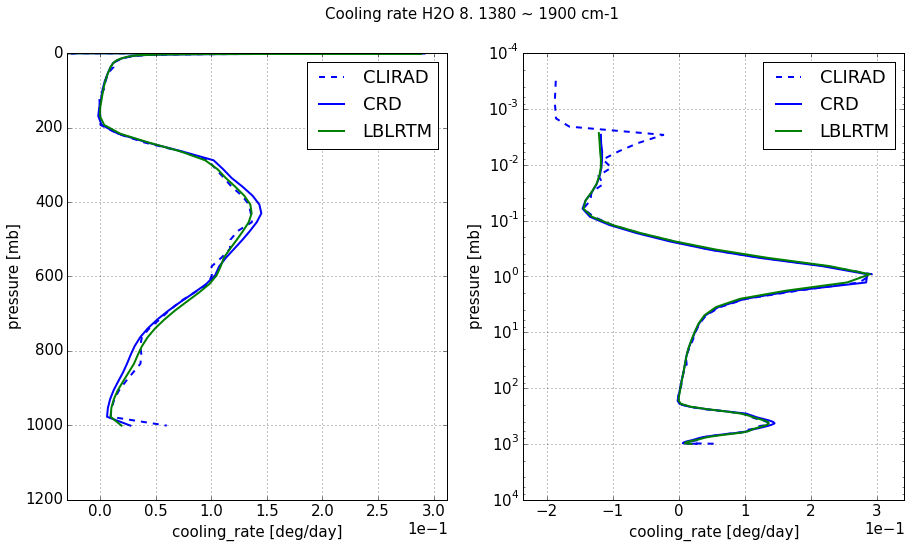


------------------------------------------------------------------------

CLIRAD-LW spectral band 9. 1900 ~ 3000 cm-1

CLIRAD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -4.861082   0.000000 -4.861082     -0.000000
30   299.800000 -4.875098   0.012047 -4.863051     -0.000178
0   1013.000000 -6.674498   3.427002 -3.247496      0.060868

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -5.120375   0.000000 -5.120375      0.000000
30   299.800000 -5.134693   0.013024 -5.121669     -0.000221
0   1013.000000 -6.625445   3.073782 -3.551663      0.050266

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -5.069402   0.000000 -5.069402      0.000000
30   299.8000 -5.083684   0.013152 -5.070533     -0.000185
0   1013.0000 -6.614782   3.026062 -3.588721      0.027784

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.259293   0.000000  0.259293     -0.000000
30    

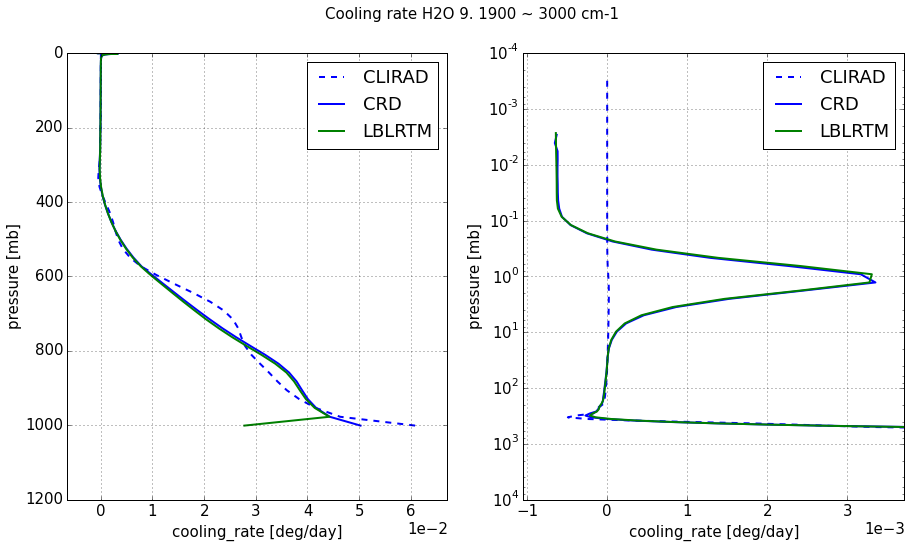


------------------------------------------------------------------------

CLIRAD-LW spectral band 10. 540 ~ 620 cm-1

CLIRAD
       pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.002417       -0          0         0            -0
30   299.800000       -0          0         0            -0
0   1013.000000       -0          0         0            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -29.563330   0.000000 -29.563330      0.000000
30   299.800000 -29.715745   0.607149 -29.108595      0.064925
0   1013.000000 -36.235420  32.287543  -3.947877      0.266056

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -29.456983   0.000000 -29.456983      0.000000
30   299.8000 -29.616186   0.631945 -28.984241      0.064959
0   1013.0000 -36.231410  32.412175  -3.819235      0.256118

CLIRAD - CRD
    pressure    flux_up  flux_down   net_flux  cooling_rate
70         0  29.563330   0.000000  29.563330     -

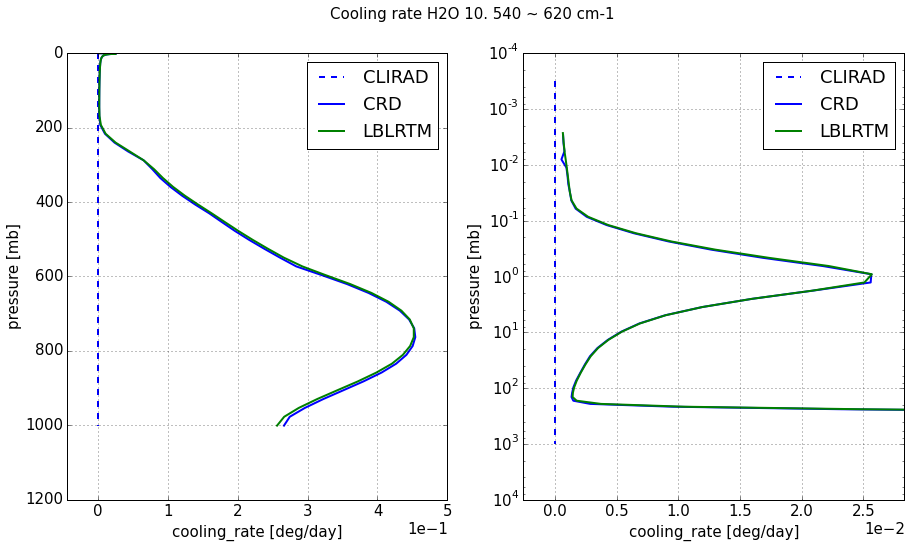


------------------------------------------------------------------------



In [38]:
print('Flux tables and cooling rates in CLIRAD spectral bands')
print()
print()

scripts_intermodel.lw_results_by_cliard_bands(
    infos_clirad=[('CLIRAD', 'b', '--', pnl_clirad)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd),
               ('LBLRTM', 'g', '-', pnl_lblrtm)],
    name_molecule=name_molecule)

In [18]:
html_download = ('<a href="./longwave_mls_{name_molecule}'
                 '_by_clirad_bands.xlsx"'
                 'download>longwave_mls_{name_molecule}'
                 '_by_clirad_bands.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

In [20]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')